In [1]:
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import re, random, pickle, glob, os, difflib
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers 
from tensorflow.keras.models import load_model
from sklearn.manifold import TSNE
from utils import *

In [2]:
print(tf.__version__)

2.3.1


In [3]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        output = z_mean + tf.exp(0.5 * z_log_var) * epsilon
        return output

In [4]:
test_root = 'test/'
model_root = 'models/'
ckpt_root = 'ckpt1/'
model_name = 'encoder.h5'
path = os.path.join(model_root, ckpt_root, model_name)
path

'models/ckpt1/encoder.h5'

In [5]:
model = load_model(path, custom_objects={'Sampling': Sampling})
# encoder = #model.layers[1]

In [6]:
test_sets = ['test_easy_1.fa', 'test_easy_2.fa', 'test_intermidate_1.fa', 'test_intermidate_2.fa', 'test_difficult_1.fa', 
             'test_difficult_2.fa', 'test_very_difficult_1.fa', 'test_very_difficult_2.fa']
easy_1 = assign_labels(read_fasta(test_root + test_sets[0]))
easy_2 = assign_labels(read_fasta(test_root + test_sets[1]))

In [7]:
test_reads_1 = np.array(seqs2onehot(np.array(easy_1.seqs)))
test_reads_1 = np.expand_dims(test_reads_1, -1)
test_reads_2 = np.array(seqs2onehot(np.array(easy_2.seqs)))
test_reads_2 = np.expand_dims(test_reads_2, -1)

In [8]:
easy_1_predictions = model.predict(test_reads_1)
easy_2_predictions = model.predict(test_reads_2)

In [9]:
embeddings_1 = easy_1_predictions[2]
embeddings_2 = easy_2_predictions[2]
X = np.hstack((embeddings_1, embeddings_2))

In [10]:
perplexity = [50, 100, 200]
d = 'cosine'
learning_rate = [50, 100, 200]
n_iter = 250

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 105492 samples in 0.002s...
[t-SNE] Computed neighbors for 105492 samples in 147.693s...
[t-SNE] Computed conditional probabilities for sample 1000 / 105492
[t-SNE] Computed conditional probabilities for sample 2000 / 105492
[t-SNE] Computed conditional probabilities for sample 3000 / 105492
[t-SNE] Computed conditional probabilities for sample 4000 / 105492
[t-SNE] Computed conditional probabilities for sample 5000 / 105492
[t-SNE] Computed conditional probabilities for sample 6000 / 105492
[t-SNE] Computed conditional probabilities for sample 7000 / 105492
[t-SNE] Computed conditional probabilities for sample 8000 / 105492
[t-SNE] Computed conditional probabilities for sample 9000 / 105492
[t-SNE] Computed conditional probabilities for sample 10000 / 105492
[t-SNE] Computed conditional probabilities for sample 11000 / 105492
[t-SNE] Computed conditional probabilities for sample 12000 / 105492
[t-SNE] Computed conditional prob

[t-SNE] Computed conditional probabilities for sample 10000 / 105492
[t-SNE] Computed conditional probabilities for sample 11000 / 105492
[t-SNE] Computed conditional probabilities for sample 12000 / 105492
[t-SNE] Computed conditional probabilities for sample 13000 / 105492
[t-SNE] Computed conditional probabilities for sample 14000 / 105492
[t-SNE] Computed conditional probabilities for sample 15000 / 105492
[t-SNE] Computed conditional probabilities for sample 16000 / 105492
[t-SNE] Computed conditional probabilities for sample 17000 / 105492
[t-SNE] Computed conditional probabilities for sample 18000 / 105492
[t-SNE] Computed conditional probabilities for sample 19000 / 105492
[t-SNE] Computed conditional probabilities for sample 20000 / 105492
[t-SNE] Computed conditional probabilities for sample 21000 / 105492
[t-SNE] Computed conditional probabilities for sample 22000 / 105492
[t-SNE] Computed conditional probabilities for sample 23000 / 105492
[t-SNE] Computed conditional proba

KeyboardInterrupt: 

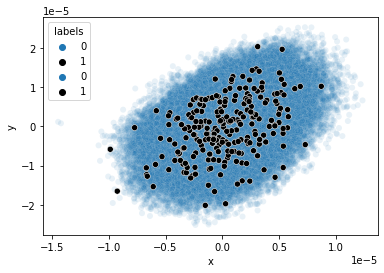

In [11]:
for p in perplexity:
    for lr in learning_rate:
        clustering = TSNE(perplexity = p, metric = d, learning_rate = lr, n_iter = n_iter, verbose = 0)
        embeddings = clustering.fit_transform(X)

        df = pd.DataFrame()
        df['x'] = embeddings[:, 0]
        df['y'] = embeddings[:, 1]
        df['labels'] = easy_1.viral
        sns.scatterplot(x="x", y="y", hue="labels", data=df[df['labels']==0], alpha=0.1)
        sns.scatterplot(x="x", y="y", hue="labels", data=df[df['labels']==1], palette=['black'])
        plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

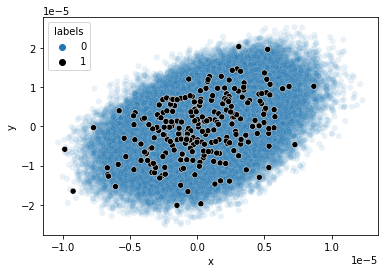

In [12]:
sns.scatterplot(x="x", y="y", hue="labels", data=df[df['labels']==0], alpha=0.1)
sns.scatterplot(x="x", y="y", hue="labels", data=df[df['labels']==1], palette=['black']); plt.show

In [67]:
# a = np.expand_dims(np.array(seqs2onehot([easy_1.loc[105487]['seqs']])), -1)
# b = encoder.predict(a)
# c = decoder.predict(b[-1]); c = np.squeeze(c)
# difflib.SequenceMatcher(None, np.argmax((c>0.01), axis=1), np.argmax(np.squeeze(a), axis=1)).ratio()